<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/ISE_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dane pomidoryEJ3dbezg.csv to Dane pomidoryEJ3dbezg.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Dane pomidoryEJ3dbezg.csv']),delimiter=';')

In [5]:
data

,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Nazwa kodowana,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,A- 3 (ClO-),NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2
0,Daktyle,1,1,1,1_1,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.057018,0.002363,0.040896,0.050755,0.002831
1,Daktyle,1,1,2,1_2,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.056111,0.001785,0.042695,0.052439,0.000054
2,Daktyle,1,1,3,1_3,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,0.056470,-0.002705,0.039837,0.052399,-0.002033
3,barszcz diluted 45mlH2O5ml,2,2,1,2_1,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,-0.016569,0.018991,-0.025790,-0.017516,0.017514
4,barszcz diluted 45mlH2O5ml,2,2,2,2_2,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,-0.014762,0.018885,-0.025828,-0.018449,0.015818
5,barszcz diluted 45mlH2O5ml,2,2,3,2_3,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,-0.012536,0.023850,-0.026117,-0.018555,0.015969
6,Tarczyn pikantny,3,3,1,3_1,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.044800,0.013696,0.036756,0.041368,0.013792
7,Tarczyn pikantny,3,3,2,3_2,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.046211,0.015298,0.036688,0.042073,0.014737
8,Tarczyn pikantny,3,3,3,3_3,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.046289,0.014268,0.037570,0.042224,0.013817
9,tymbark klasyczny E190127,4,3,1,4_1,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.047045,0.014777,0.036836,0.042851,0.013724


In [6]:
X = data.iloc[:,5:].values
X

array([[ 5.98536900e-02,  5.75878340e-02,  6.50354370e-02,
         5.75191440e-02,  5.14460000e-02,  7.82372570e-02,
         7.26124860e-02,  5.70177570e-02,  2.36292800e-03,
         4.08958000e-02,  5.07547620e-02,  2.83133600e-03],
       [ 5.78571970e-02,  5.62535960e-02,  6.53637570e-02,
         5.75793480e-02,  5.22270000e-02,  7.80455370e-02,
         7.07653110e-02,  5.61105670e-02,  1.78540100e-03,
         4.26950450e-02,  5.24389210e-02,  5.42364000e-05],
       [ 5.84847300e-02,  5.54285500e-02,  6.47382760e-02,
         5.70051440e-02,  5.25016710e-02,  7.60545730e-02,
         7.11578860e-02,  5.64703480e-02, -2.70517400e-03,
         3.98372530e-02,  5.23985590e-02, -2.03258800e-03],
       [ 3.83119010e-02,  3.92115770e-02,  1.91931050e-02,
         1.15434280e-02,  6.91414000e-03,  5.97569870e-02,
         6.16167750e-02, -1.65687680e-02,  1.89907940e-02,
        -2.57904300e-02, -1.75163210e-02,  1.75137980e-02],
       [ 3.70885350e-02,  3.60884560e-02,  1.9765410

In [7]:
from sklearn.preprocessing import StandardScaler, normalize;

# Scaling the data so that all the features become comparable
sc = StandardScaler();
data_sc = sc.fit_transform(X);

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
data_sc_normalized = normalize(X)

# Converting the numpy array into a pandas DataFrame
df_sc_normalized = pd.DataFrame(X)
df_sc = pd.DataFrame(X)

In [24]:
df_sc

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.057018,0.002363,0.040896,0.050755,0.002831
1,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.056111,0.001785,0.042695,0.052439,0.000054
2,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,0.056470,-0.002705,0.039837,0.052399,-0.002033
3,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,-0.016569,0.018991,-0.025790,-0.017516,0.017514
4,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,-0.014762,0.018885,-0.025828,-0.018449,0.015818
5,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,-0.012536,0.023850,-0.026117,-0.018555,0.015969
6,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.044800,0.013696,0.036756,0.041368,0.013792
7,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.046211,0.015298,0.036688,0.042073,0.014737
8,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.046289,0.014268,0.037570,0.042224,0.013817
9,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.047045,0.014777,0.036836,0.042851,0.013724


In [25]:
pca = PCA(n_components=12)
pca.fit(df_sc)

PCA(n_components=12)

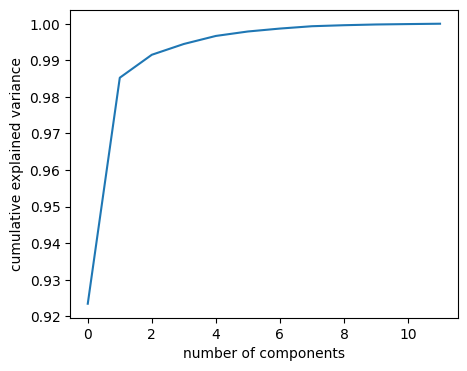

In [26]:
plt.figure(figsize=(5, 4))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
pca.explained_variance_ratio_

array([9.23453782e-01, 6.17815324e-02, 6.27828204e-03, 2.94924829e-03,
       2.19800867e-03, 1.21604360e-03, 7.99996867e-04, 6.38719578e-04,
       2.75395629e-04, 2.02528023e-04, 1.09251995e-04, 9.72106802e-05])

<ipython-input-28-d20850eb6acd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')


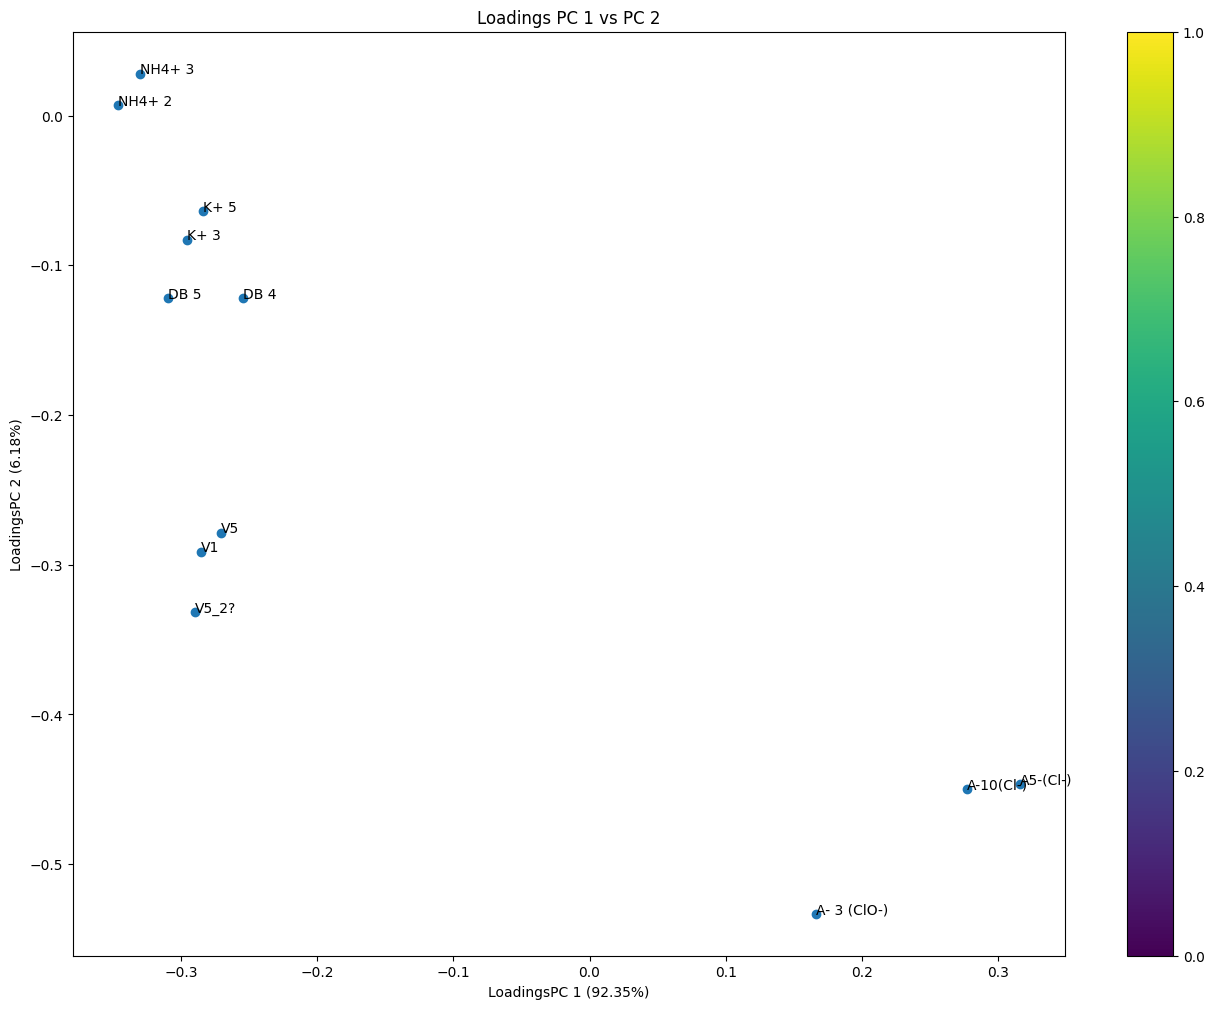

In [28]:
name = data.columns[5:]
plt.figure(figsize=(16,12))
plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')
plt.title('Loadings PC 1 vs PC 2')
plt.xlabel('LoadingsPC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('LoadingsPC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
for i, txt in enumerate(name):
    plt.annotate(txt, (pca.components_[0,:][i],pca.components_[1,:][i]))
plt.colorbar();

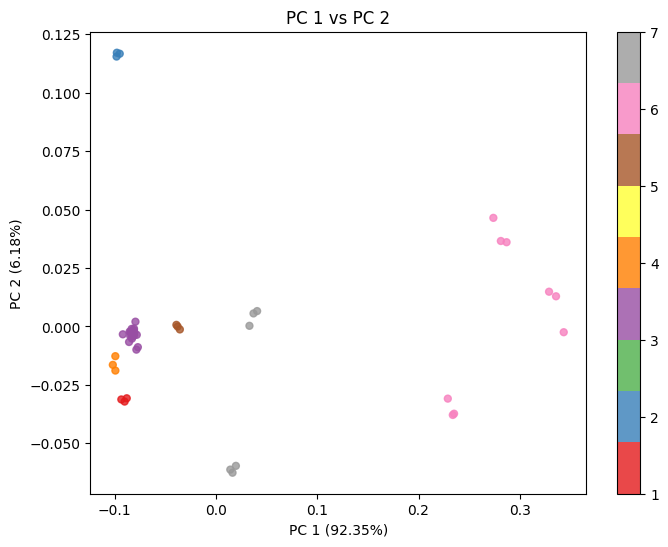

In [29]:
x_pca = pca.transform(df_sc)
#name2 = data['Nazwa próbki']
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='Set1', s = 100,  c=data['Rodzaj próbki'], alpha = 0.8, marker = '.')

plt.title('PC 1 vs PC 2')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
#for i, txt in enumerate(name2):
#    plt.annotate(txt, (x_pca[i,0],x_pca[i,1]))
plt.colorbar();

In [30]:
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=30, verbose=1, random_state=123)
projections = tsne.fit_transform(df_sc)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 48 samples in 0.001s...
[t-SNE] Computed neighbors for 48 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 48 / 48
[t-SNE] Mean sigma: 0.007248
[t-SNE] KL divergence after 250 iterations with early exaggeration: 176.755951
[t-SNE] KL divergence after 1000 iterations: 0.105787


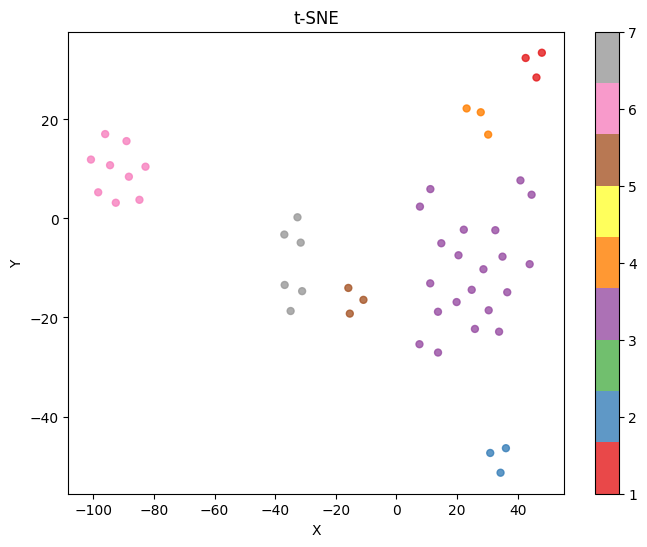

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(projections[:,0],projections[:,1],cmap='Set1', s = 100,  c=data['Rodzaj próbki'], alpha = 0.8, marker = '.')

plt.title('t-SNE')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();